# Method of moments

<div style="text-align: right"> Umair Ul Hasan Mohammed, with material by Professor Dino Konstantopoulos</div>

using a simple dataset and modeling it by matching one of the pdfs I learned about today. Find the most likely parameters of your pdf using MOM.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The **histogram**, the second plot, below the whisker plot is super-important: It tells us *how* the data is distributed and gives us the opportunity to *find the function that approximates our data*: It needs to produce (fake) data that has the same histogram as the real data. The histogram is a **probability distribution**.

The **expected value** of a discrete random variable is the probability-weighted average of all its possible values. In other words, each possible value the random variable can assume is multiplied by its probability of occurring, and the resulting products are summed to produce the expected value. Intuitively, a random variable's expected value represents the mean of a large number of independent realizations of the random variable. The expected value is also known as the **expectation**, mathematical expectation, **mean**, or **first moment**.

A [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) gives us the probability of a random variable assuming a certain value ($y$ from $x$). 

It's the extension of our `p` function to infinite dictionaries :-)

Let's plot the $y$s of the normal distribution, for many $x$s:

In [5]:
import scipy.stats as stats
stats.norm.pdf(x=168,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.03722515686677741

In [6]:
stats.norm.pdf(x=174,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.04865149760993082

In [7]:
stats.norm.pdf(x=180,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.03722515686677741

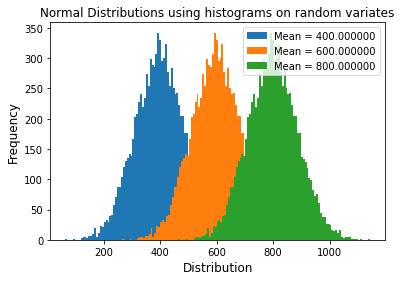

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
for mean in range(400, 900, 200):
    normal_dist = stats.norm.rvs(size=10000, loc=mean, scale=90, 
                             random_state=0) 
    pd.Series(normal_dist).plot(kind="hist", bins=100, 
                                label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Normal Distributions using histograms on random variates")
    plt.legend()

lets plot pdf of above normal random variates

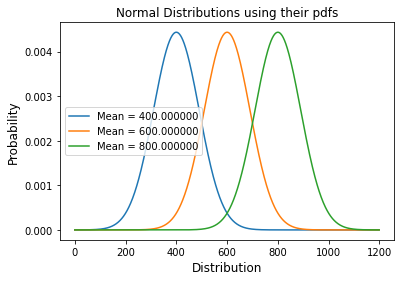

In [8]:
for mean in range(400, 900, 200):
    n = np.arange(0, 1200)
    normal = stats.norm.pdf(n, mean, 90)
    plt.plot(n, normal, label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Normal Distributions using their pdfs")
    plt.legend()

In other words, the **pdf** is the *theoretical* **histogram** of a known distribution!

The [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) gives us the probability that a certain random observation will have a lower value than the one provided:

In [9]:
stats.norm.cdf(x=186,         # Cutoff value (quantile) to check
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

0.9283230216395894

The [percent point function](https://en.wikipedia.org/wiki/Quantile_function) (PPF), also called [quantile function](https://en.wikipedia.org/wiki/Quantile_function) gives us the quantile using a probability as input (inverse of cumulative distribution function) ($x$ from $y$).

In [10]:
stats.norm.ppf(q=0.93,      # Cutoff value (quantile) to check
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

186.1014864310692

Lets work on out data set of mercedez benz USA car sales

In [15]:
carSales = pd.read_csv("mercedes benz USA car sales in unit.csv", sep = ";")
carSales.head()

Date Mercedes-Benz Cars unit sales (USA)
0  2008Q1                              67,219
1  2008Q2                              68,341
2  2008Q3                              64,866
3  2008Q4                              50,734
4  2009Q1                              43,927

In [16]:
carSales.columns

Index(['Date', 'Mercedes-Benz Cars unit sales (USA)'], dtype='object')

## Data Cleaning
this part includes converting string value of sales into a float value, to make it compatible with plotting values

In [31]:
carSales["Mercedes-Benz Cars unit sales (USA)"] = 
carSales["Mercedes-Benz Cars unit sales (USA)"].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)
carSales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 36 non-null     object 
 1   Mercedes-Benz Cars unit sales (USA)  36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


<ipython-input-31-bb78f7405b20>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  carSales["Mercedes-Benz Cars unit sales (USA)"] = carSales["Mercedes-Benz Cars unit sales (USA)"].str.replace('[A-Za-z]', '').str.replace(',', '.').astype(float)


In [32]:
carSales.head()

Date  Mercedes-Benz Cars unit sales (USA)
0  2008Q1                               67.219
1  2008Q2                               68.341
2  2008Q3                               64.866
3  2008Q4                               50.734
4  2009Q1                               43.927

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mercedes-Benz Cars unit sales (USA)', ylabel='Density'>

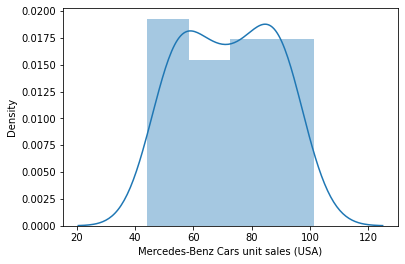

In [33]:
import seaborn as sns
df = carSales
sns.distplot(df['Mercedes-Benz Cars unit sales (USA)'])

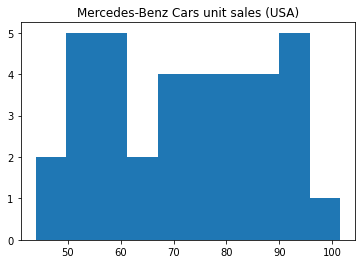

In [34]:
_ = carSales.hist(grid=False)

In [35]:
carSales.skew()

<ipython-input-35-dbe99f87a1b3>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  carSales.skew()


Mercedes-Benz Cars unit sales (USA)   -0.007515
dtype: float64

## Log Transform
Log transformation is most likely the first thing you should do to remove skewness from the predictor.
It can be easily done via `Numpy`, just by calling the log() function on the desired column

In [37]:
df = carSales
benz_log = np.log(df['Mercedes-Benz Cars unit sales (USA)'])
benz_log.skew()

-0.27436409833615466

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mercedes-Benz Cars unit sales (USA)', ylabel='Density'>

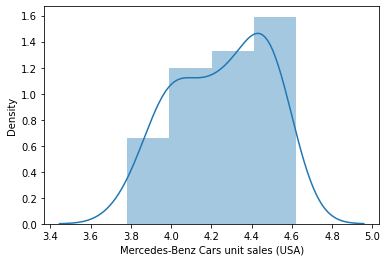

In [39]:
sns.distplot(benz_log)

Much nicer, right? It’s not normally distributed for sure, but is a lot better than what we had before!

The log transformation isn’t the only one you can use. Let’s explore a couple of more options.

## Square Root Transform
The square root sometimes works great and sometimes isn’t the best suitable option. In this case, I still expect the transformed distribution to look somewhat exponential, but just due to taking a square root the range of the variable will be smaller.

In [40]:
benz_sqrt = np.sqrt(df['Mercedes-Benz Cars unit sales (USA)'])
benz_sqrt.skew()

-0.13885450852143108

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mercedes-Benz Cars unit sales (USA)', ylabel='Density'>

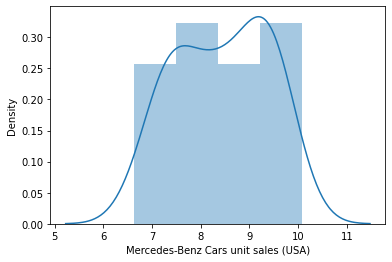

In [41]:
sns.distplot(benz_sqrt)

The distribution is pretty much the same, but the range is smaller, as expected.

## Box-Cox Transform
The [Box-Cox transform](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation), named after statisticians [George Box](http://mathshistory.st-andrews.ac.uk/Biographies/Box.html) and [Sir David Roxbee Cox](https://www.britannica.com/biography/David-Cox-British-statistician) who collaborated on a 1964 paper and developed the technique, is the classical way for handling skewed data. To use it, your data must be positive — so that can be a bummer sometimes.

At the core of the Box Cox transformation is an exponent, $λ$, which varies from -5 to 5. All values of $λ$ are considered and the optimal value for your data is selected; The *optimal value* is the one which results in the best approximation of a normal distribution curve.

we can import the Box-Cox transform from `Scipy`, but the check for the skew you’ll need to convert the resulting Numpy array to a Pandas Series:

In [43]:
from scipy import stats

benz_boxcox = stats.boxcox(df['Mercedes-Benz Cars unit sales (USA)'])[0]
pd.Series(benz_boxcox).skew()

-0.07430206583438594

C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

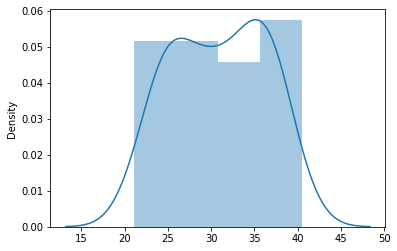

In [44]:
sns.distplot(benz_boxcox)

The distribution is pretty similar to the one made by the log transformation, but just a touch less bimodal in dispersion (since the two bumps are closer together), but more bimodal in centrality (since the two bumps are of almost equal magnitude).

Skewed data can mess up the power of our predictive model if we don’t address it correctly.

In general, conducting transformations on the data before modeling it goes by the name of **kernel methods**.

C:\Users\umair\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\umair\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


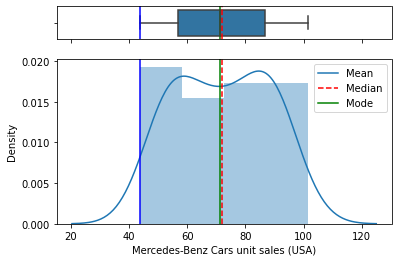

In [47]:
#from __future__ import print_function, division
df = carSales
df.head()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Mercedes-Benz Cars unit sales (USA)'].mean()
median=df['Mercedes-Benz Cars unit sales (USA)'].median()
mode=df['Mercedes-Benz Cars unit sales (USA)'].mode()[0]

sns.boxplot(df['Mercedes-Benz Cars unit sales (USA)'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df['Mercedes-Benz Cars unit sales (USA)'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

The **whisker plot** is the first graph above.

- The line in the middle is the median value of the data. Median is used over the mean
since it is more robust to outlier values. The first quartile is essentially the 25th
percentile; i.e 25% of the points in the data fall below that value. The third quartile is the
75th percentile; i.e 75% of the points in the data fall below that value. The min and max
values represent the upper and lower ends of our data range.

- When the box plot is short it implies that much of your data points are similar, since
there are many values in a small range

- When the box plot is tall it implies that much of your data points are quite different,
since the values are spread over a wide range

- If the median value is closer to the bottom then we know that most of the data has
lower values. If the median value is closer to the top then we know that most of the
data has higher values. Basically, if the median line is not in the middle of the box
then it is an indication of skewed data.

- Are the whiskers very long? That means your data has a high standard deviation
and variance i.e the values are spread out and highly varying. If you have long
whiskers on one side of the box but not the other, then your data may be highly
varying only in one direction.


## The goal of Data Science

>**Goal**: Match the histogram of the data to a known pdf (figure out the parameters of that pdf if the pdf is parametric), and then use that pdf to generate data, rather than using the original dataset.



The **method of moments** simply assigns the **empirical** (coming from the data) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters*** of the Gamma!

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):

<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data, with parameters:

<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

($\bar{X}$ is the mean, while $S^2$ is the variance of each column of the dataset).

In [54]:
mean = df['Mercedes-Benz Cars unit sales (USA)'].mean()
var = df['Mercedes-Benz Cars unit sales (USA)'].var()

In [55]:
print(f"mean value is {mean}, and standard variation values is {var}")

mean value is 72.05144444444444, and standard variation values is 256.89403888253975


plotting pdf to the original histogram using normal distribution. 

<ipython-input-56-510d6179ff24>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2,color='g')


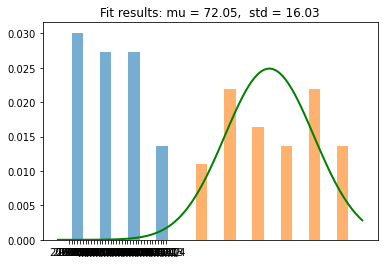

In [56]:
from scipy.stats import norm
import math

# Plot the histogram.
plt.hist(carSales, bins=10, density=True, alpha=0.6)

# Get the parameters
mu = mean
std = math.sqrt(var)

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2,color='g')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

Now lets do using gamma distribution

In [66]:
precip = pd.read_table("nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

Jan   Feb   Mar    Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                         
1871  2.76  4.58  5.01   4.13  3.30  2.98  1.58  2.36  0.95  1.31  2.13  1.65
1872  2.32  2.11  3.14   5.91  3.09  5.17  6.10  1.65  4.50  1.58  2.25  2.38
1873  2.96  7.14  4.11   3.59  6.31  4.20  4.63  2.36  1.81  4.28  4.36  5.94
1874  5.22  9.23  5.36  11.84  1.49  2.87  2.65  3.52  3.12  2.63  6.12  4.19
1875  6.15  3.06  8.14   4.22  1.73  5.63  8.12  1.60  3.79  1.25  5.46  4.30

In the year 1871, in the month of January, Nashville saw 2.76 inches of rainfall.

### Data Exploration: The Histogram

Let's do some data exploration with the ***histogram*** of precipitations per month. The histogram tells us, for each month of the year, what's the most frequent number of inches of rain from 1871 onward.

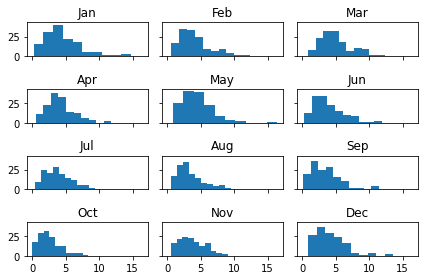

In [67]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()


The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data is *skewed*, with a longer tail to the right than to the left
2. The data is positive-valued, since they are measuring rainfall
3. The data is continuous

Even just by ***eyeballing*** the theoretical pdfs we introduced (normal, Poisson, etc.) , ***even if you did not know what the Gamma distribution is usually used for***, a good option appears to be the **gamma distribution**: The curves look like ***Gaussians with long tails***. That's a Gamma!

<div style="font-size: 120%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

### Data Cleansing 

There's something ***wrong*** with our data.. if we open it in a text editor, we will find a value of **NA** for October of 1963 (take a look). 

So we have to do some **data cleansing** first. 

Given what we are trying to do, it is ***sensible*** to fill in the missing value with the average of the available values (another option would have been the average of the months of September and November 1963). Filling in with 0 would be a *bad idea*.

In [68]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

Jan   Feb   Mar    Apr    May   Jun   Jul   Aug    Sep   Oct   Nov  \
Year                                                                        
1871  2.76  4.58  5.01   4.13   3.30  2.98  1.58  2.36   0.95  1.31  2.13   
1872  2.32  2.11  3.14   5.91   3.09  5.17  6.10  1.65   4.50  1.58  2.25   
1873  2.96  7.14  4.11   3.59   6.31  4.20  4.63  2.36   1.81  4.28  4.36   
1874  5.22  9.23  5.36  11.84   1.49  2.87  2.65  3.52   3.12  2.63  6.12   
1875  6.15  3.06  8.14   4.22   1.73  5.63  8.12  1.60   3.79  1.25  5.46   
...    ...   ...   ...    ...    ...   ...   ...   ...    ...   ...   ...   
2007  3.32  1.84  2.26   2.75   3.30  2.37  1.47  1.38   1.99  4.95  6.20   
2008  4.76  2.53  5.56   7.20   5.54  2.21  4.32  1.67   0.88  5.03  1.75   
2009  4.59  2.85  2.92   4.13   8.45  4.53  6.03  2.14  11.08  6.49  0.67   
2010  4.13  2.77  3.52   3.48  16.43  4.96  5.86  6.99   1.17  2.49  5.41   
2011  2.31  5.54  4.59   7.51   4.38  5.04  3.46  1.78   6.20  0.93  6.15   

       Dec  
Year        
1871  1.65  
1872  2.38  
1873  5.94  
1874  4.19  
1875  4.30  
...    ...  
2007  3.83  
2008  6.72  
2009  3.99  
2010  1.87  
2011  4.25  

[141 rows x 12 columns]

In [69]:
precip_mean = precip.mean()
precip_mean

Jan    4.523688
Feb    4.097801
Mar    4.977589
Apr    4.204468
May    4.325674
Jun    3.873475
Jul    3.895461
Aug    3.367305
Sep    3.377660
Oct    2.610500
Nov    3.685887
Dec    4.176241
dtype: float64

In [70]:
precip_var = precip.var()
precip_var

Jan    6.928862
Feb    5.516660
Mar    5.365444
Apr    4.117096
May    5.306409
Jun    5.033206
Jul    3.777012
Aug    3.779876
Sep    4.940099
Oct    2.741659
Nov    3.679274
Dec    5.418022
dtype: float64

We then use these moments to estimate $\alpha$ and $\beta$ for each month:
```python
alpha_mom = ...
beta_mom = ...
alpha_mom, beta_mom
```

In [71]:
alpha_mom = (precip_mean*precip_mean)/(precip_var) 
beta_mom = (precip_var) / precip_mean

In [72]:
alpha_mom, beta_mom

(Jan    2.953407
 Feb    3.043866
 Mar    4.617770
 Apr    4.293694
 May    3.526199
 Jun    2.980965
 Jul    4.017624
 Aug    2.999766
 Sep    2.309383
 Oct    2.485616
 Nov    3.692511
 Dec    3.219070
 dtype: float64,
 Jan    1.531684
 Feb    1.346249
 Mar    1.077920
 Apr    0.979219
 May    1.226724
 Jun    1.299403
 Jul    0.969593
 Aug    1.122522
 Sep    1.462581
 Oct    1.050243
 Nov    0.998206
 Dec    1.297344
 dtype: float64)

Then, use the `gamma.pdf` function in `scipy.stats.distributions` to plot the distributions implied by the calculated alphas and betas

For example, here is `January` (and note that scipy's gamma is the *gamma distribution*, not the $\Gamma$ function that interpolates $n!$ to real numbers, even though the $\Gamma$ function figures in the denominator of the gamma distribution):

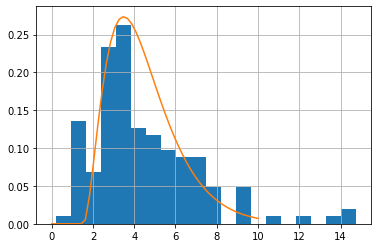

In [73]:
from scipy.stats.distributions import gamma

precip.Jan.hist(density=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

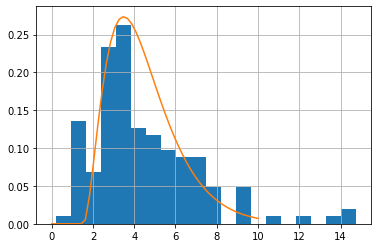

In [74]:
from scipy.stats.distributions import gamma

precip.Jan.hist(density=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

Not bad for january :-) Looping over all months now, create a grid of plots for the distribution of rainfall, using the gamma distribution. Here is how you can create a grid of plots:

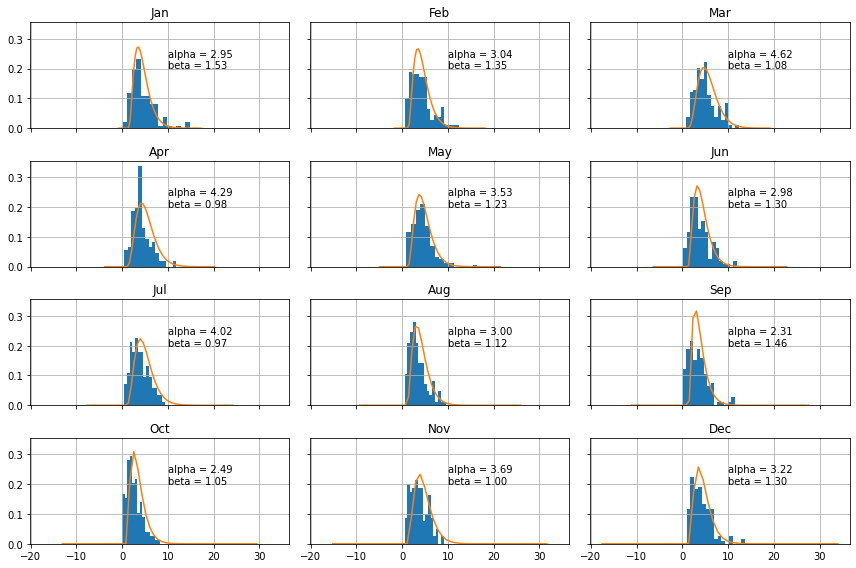

In [75]:
axs = precip.hist(density=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():

    # Get month
    m = ax.get_title()

    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))

    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))

plt.tight_layout()

### Conclusion

In math, a **moment** is a specific quantitative measure of the ***shape of a set of points***. 


For a distribution of mass or probability on a bounded interval, the collection of all the moments (of all orders, from 0 to $\infty$) ***uniquely determines the distribution***. This is related to [Taylor's approximation theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem).

Minimum number of moments we need in the **Method of Moments** equal the ***number of the parameters in the estimator***! For each moment, we equate the moment of the ***model + parameters*** to the moment of the dataset. That gives us ***one*** equation for the parameters. We will need as many equations (thus moments) as there are parameters!
